In [1]:

from data.data_preparation import prepare_data
import time

start = time.time()
prepare_data()
end = time.time() - start
print('Temps pour la préparation des données :', end)



Air quality data of bj prepared ！
Air quality data of ld prepared ！
Meteo data of bj prepared ！
Meteo data of ld prepared ！
Data splitted into training and test sets !
Temps pour la préparation des données : 493.2467360496521


### Sanity check of the prepared data :
##### We plot the matrices to check where the data is missing

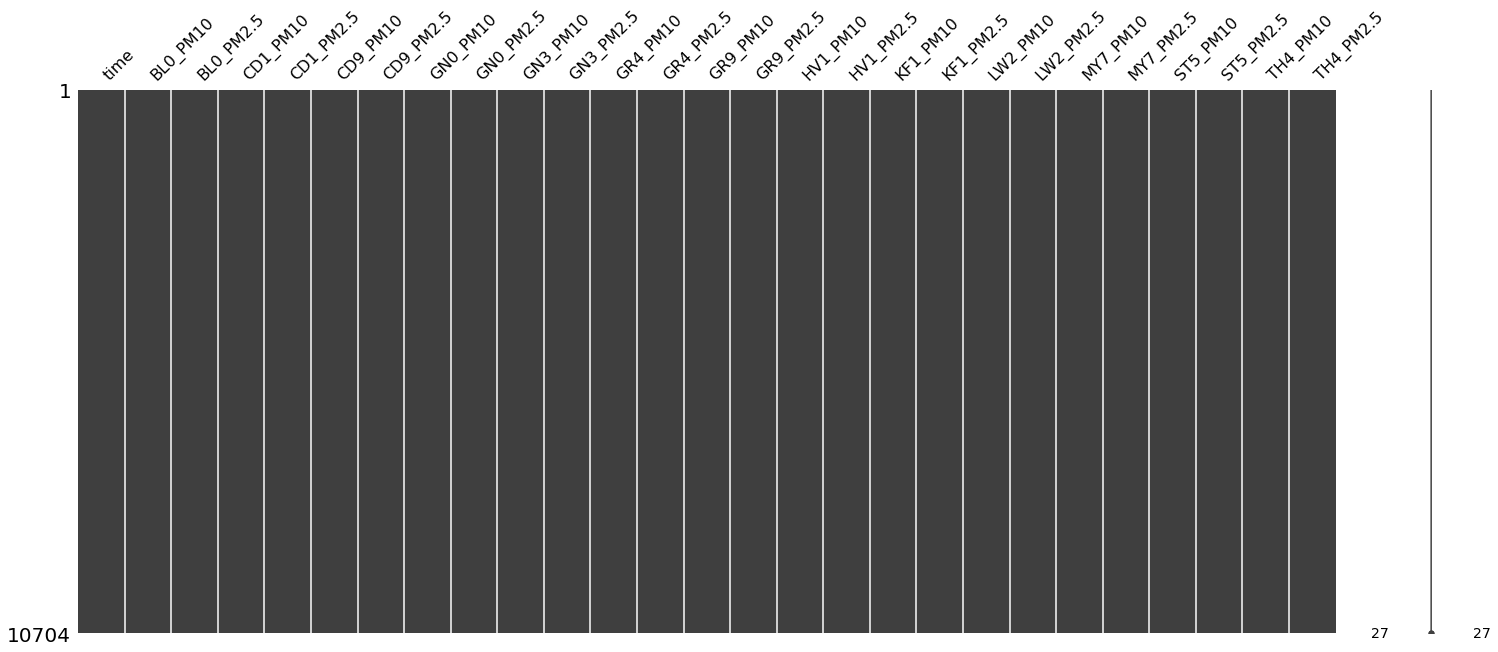

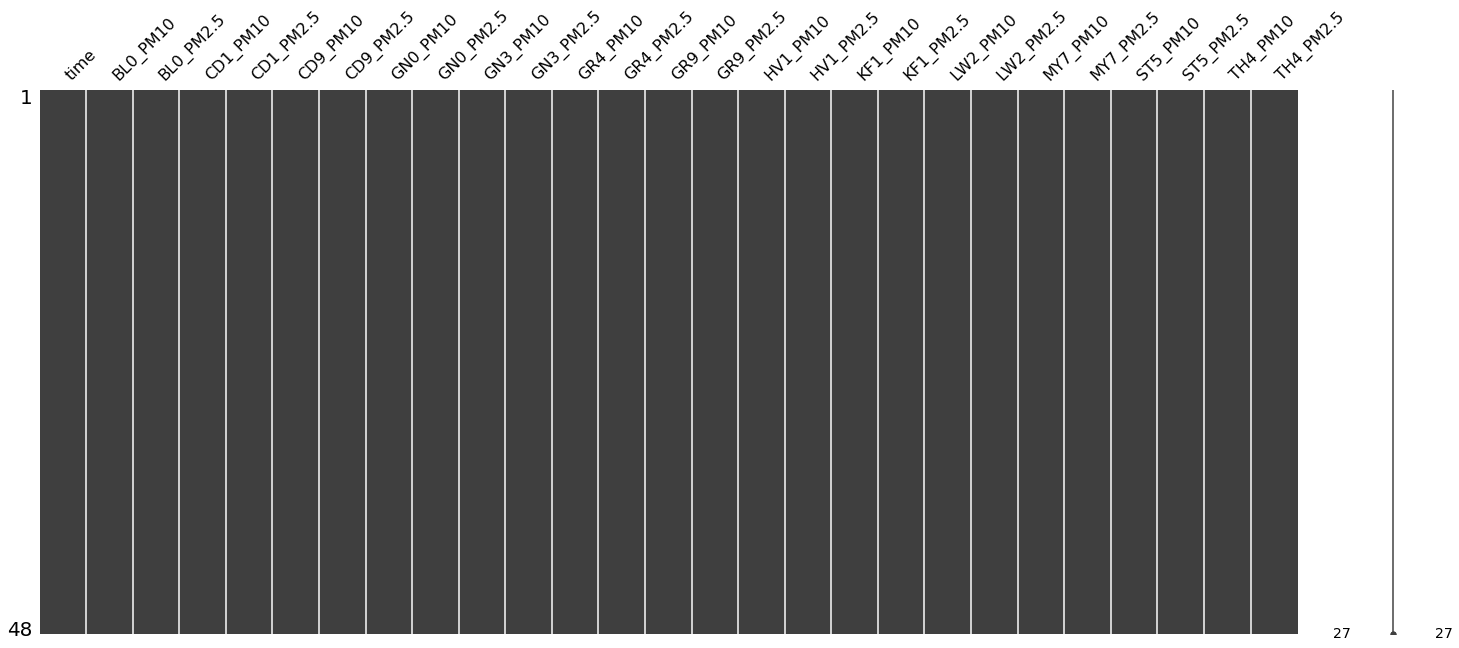

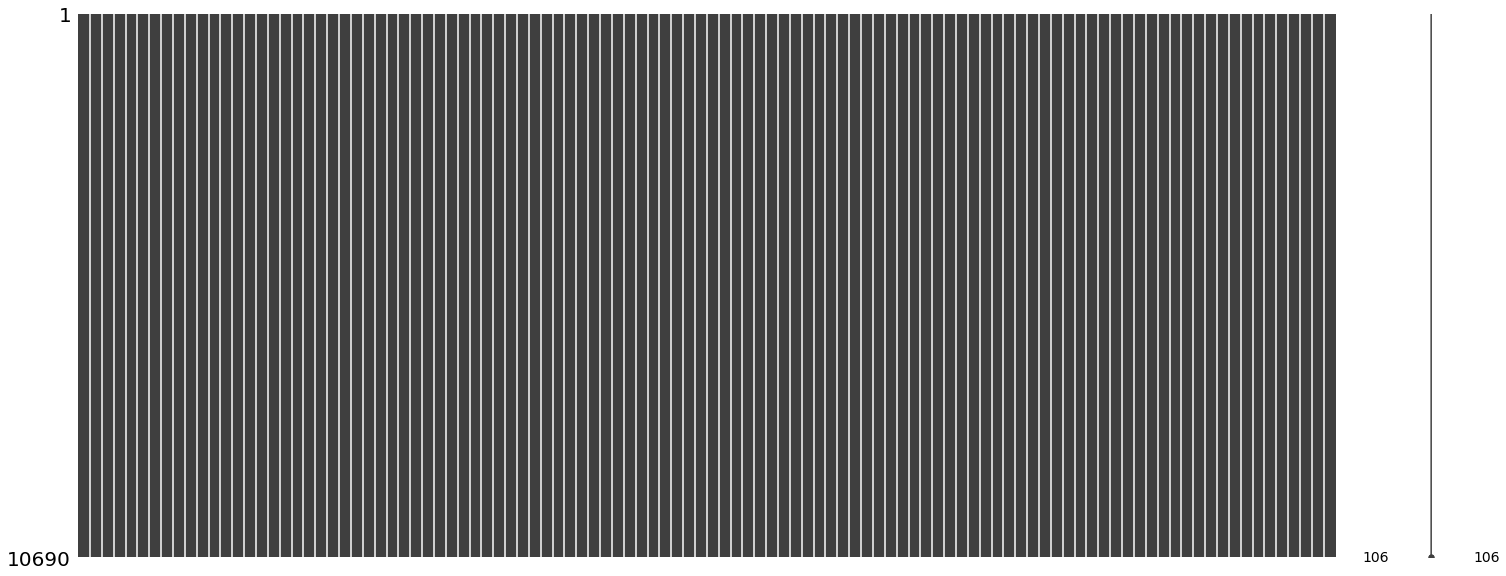

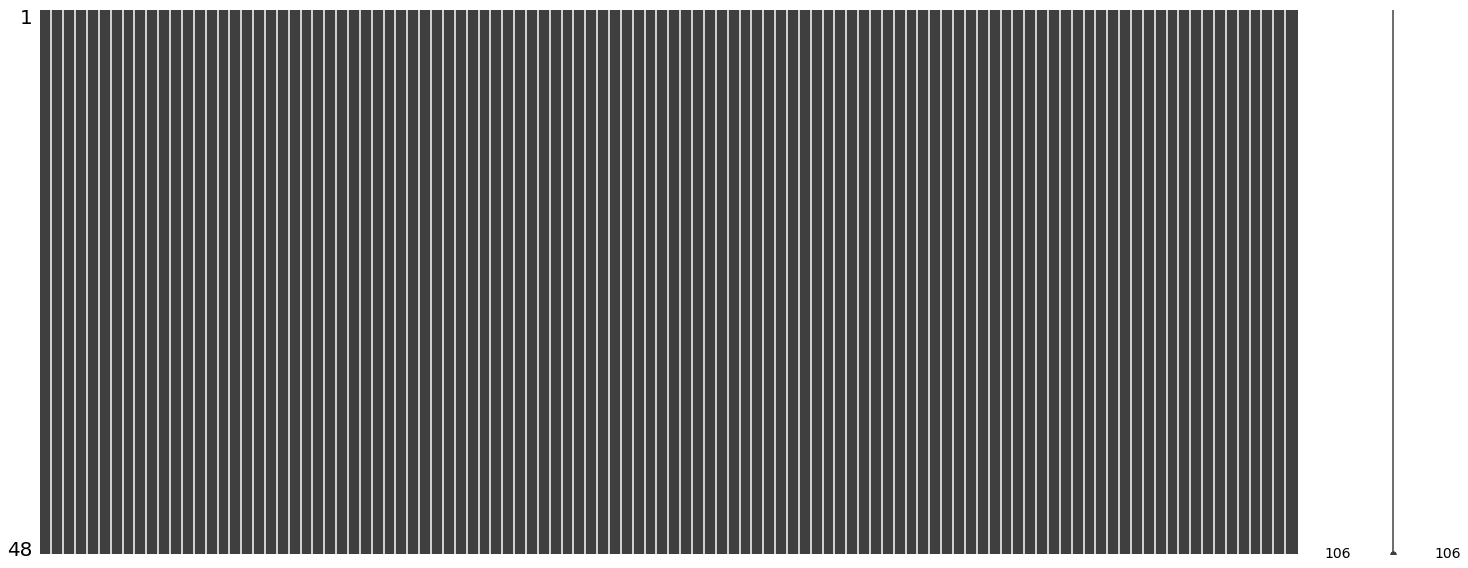

In [2]:
import pandas as pd
import missingno as mso

ld_aq_train_data = pd.read_csv('./prepared_data/ld_aq_train_data.csv')
ld_aq_test_data = pd.read_csv('./prepared_data/ld_aq_test_data.csv')
bj_aq_train_data = pd.read_csv('./prepared_data/bj_aq_train_data.csv')
bj_aq_test_data = pd.read_csv('./prepared_data/bj_aq_test_data.csv')

mso.matrix(ld_aq_train_data)
mso.matrix(ld_aq_test_data)
mso.matrix(bj_aq_train_data)
mso.matrix(bj_aq_test_data)

In [3]:
from dummy_model.dummy_model import predict_dummy
import time

start = time.time()
predict_dummy()
end = time.time() - start
print('Temps pour la prédiction en utilisant dummy :', end)

Temps pour la prédiction en utilisant dummy : 0.43147706985473633


In [1]:
from SVR_model.SVR_model_impl import predict_SVR
import time

start = time.time()
predict_SVR()
end = time.time() - start
print('Temps pour la prédiction en utilisant SVR :', end)

Using TensorFlow backend.
Temps pour la prédiction en utilisant SVR : 8174.276254415512


In [ ]:
from SVR_model.SVR_model_impl import predict_SVR
import time

start = time.time()
predict_SVR()
end = time.time() - start
print('Temps pour la prédiction en utilisant SVR :', end)

In [ ]:
from GBRT_model.GBRT_model_impl import predict_GBRT
import time

start = time.time()
predict_GBRT()
end = time.time() - start
print('Temps pour la prédiction en utilisant SVR :', end)

In [1]:
from GBRT_model.GBRT_model_impl import predict_GBRT
import time

start = time.time()
predict_GBRT()
end = time.time() - start
print('Temps pour la prédiction en utilisant GBRT :', end)

Using TensorFlow backend.
BL0


Predictions of dummy method results :
PM 2.5 RMSE in London : 5.152129593779326
PM 10 RMSE in London : 9.919367992363659
PM 2.5 RMSE in Beijing : 32.712237975059644
PM 10 RMSE in Beijing : 37.58265283740982
O3 RMSE in Beijing : 39.85503476855063
Predictions of svr method results :
PM 2.5 RMSE in London : 0.15984570999187267
PM 10 RMSE in London : 1.3680517054205055
PM 2.5 RMSE in Beijing : 1.269228563828763
PM 10 RMSE in Beijing : 3.053684149299118
O3 RMSE in Beijing : 0.9375606535175176


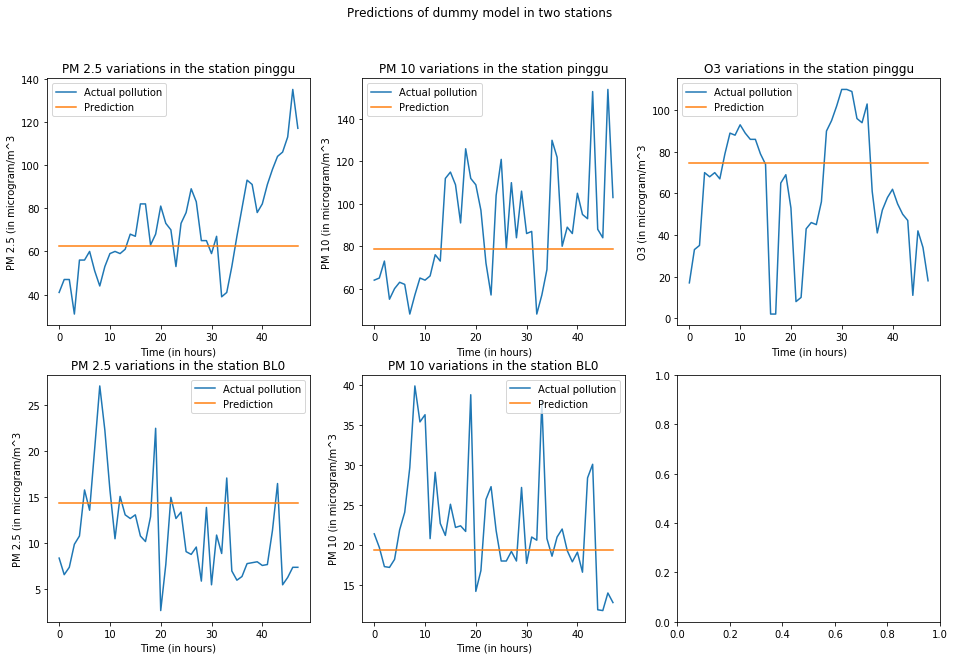

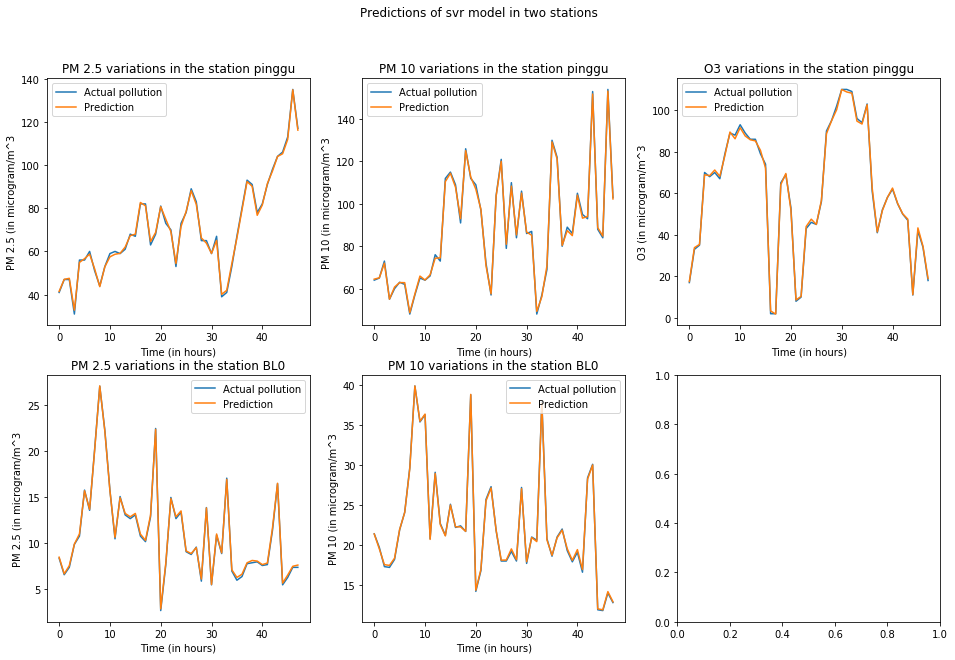

In [3]:
from prediction.compare_predictions import compare_predictions

methods = ['dummy', 'svr']
for method in methods:
    compare_predictions(method)
